# Deep Understanding of Deep Learning Practice
## Chapter: Math,Numpy,Pytorch
### Topic: Softmax function
#### Shahjalal Shanto
##### Department of Chemistry, University of Chittagong
**22 February 2024**

In [3]:
#importing libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

**Future References for me to write Latex Code in Jupyter notebook**

* How to write: https://jupyterbook.org/en/stable/content/math.html#math-blocks
* How to write Greek symbol: https://letsfigureout.com/greek-alphabet-in-a-jupyter-notebook/

 <h2 style='text-align: center;'>Softmax function </h2>
 
 
$$
\sigma_{i} = \frac {e^{z_i}}{\Sigma e^z}
$$

**Note**
* All the values of the softmax Function is in between 0 and 1
* Sum of all the values is 1.

**Natural Exponential Function:** <p> Natural exponential function <span class="bolded"> $f(x) =e^x$ </span> is used in softmax function. the value of $e^x$ never become zero or negative so it is very usefull to use in probabiliy </p>

**Note:** 
* *In DL, During categorizing data the arbitary numerical value are inputed in softmax function and its output is somewhat indicates probabiliy values and categorizes data*

### Calculating Softmax Function Manually using numpy

In [4]:
z = [1,2,3]
#Computing softmax result
num = np.exp(z)
#denominator
den = np.sum(np.exp(z))
#softmax
sigma = num/den
print(f"Outputs after passing through exponential funtion: {num}"), print(" ")
print(f"Sum of the outputs after passing through exponential funtion: {den}"), print(" ")
print(f"sigma: {sigma}"), print(" ")
print(f"sum of all the output: {np.sum(sigma)}")

Outputs after passing through exponential funtion: [ 2.71828183  7.3890561  20.08553692]
 
Sum of the outputs after passing through exponential funtion: 30.19287485057736
 
sigma: [0.09003057 0.24472847 0.66524096]
 
sum of all the output: 1.0


In [5]:
#Repeating with some random integers
z = np.random.randint(-5,15,25)
print(f"Value of z: {z}"), print(" ")
#Compute the softmax result
num = np.exp(z)
print(f"Outputs after passing through exponential funtion: {num}"), print(" ")
#denominator
den = np.sum(np.exp(z))
print(f"Sum of the outputs after passing through exponential funtion: {den}"), print(" ")
#softmax
sigma = num/den
print(f"sigma: {sigma}"), print(" ")
print(f"sum of all the output: {np.sum(sigma)}")

Value of z: [ 8  5  9  1  5  3  5  6 10 11  3  7 13 10  1 -2 13  6 -3 14 12 -3  7  4
  0]
 
Outputs after passing through exponential funtion: [2.98095799e+03 1.48413159e+02 8.10308393e+03 2.71828183e+00
 1.48413159e+02 2.00855369e+01 1.48413159e+02 4.03428793e+02
 2.20264658e+04 5.98741417e+04 2.00855369e+01 1.09663316e+03
 4.42413392e+05 2.20264658e+04 2.71828183e+00 1.35335283e-01
 4.42413392e+05 4.03428793e+02 4.97870684e-02 1.20260428e+06
 1.62754791e+05 4.97870684e-02 1.09663316e+03 5.45981500e+01
 1.00000000e+00]
 
Sum of the outputs after passing through exponential funtion: 2368743.7788991565
 
sigma: [1.25845523e-03 6.26547964e-05 3.42083597e-03 1.14756262e-06
 6.26547964e-05 8.47940461e-06 6.26547964e-05 1.70313394e-04
 9.29879626e-03 2.52767489e-02 8.47940461e-06 4.62959805e-04
 1.86771316e-01 9.29879626e-03 1.14756262e-06 5.71337789e-08
 1.86771316e-01 1.70313394e-04 2.10183426e-08 5.07697073e-01
 6.87093272e-02 2.10183426e-08 4.62959805e-04 2.30494115e-05
 4.22164697e-07]

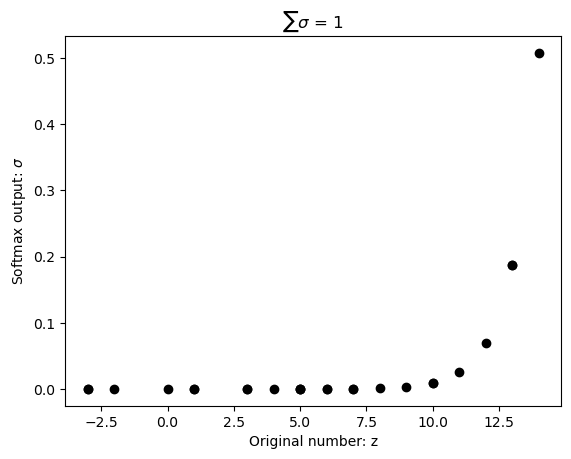

In [25]:
#plotting it in a graph
plt.plot(z,sigma,'ko')
plt.xlabel("Original number: z")
plt.ylabel("Softmax output: $\sigma$")
plt.title("$\sum\sigma$ = %g" %np.sum(sigma))
plt.show()

### Calculating Softmax Function Manually using pytorch

**nn.Softmax(dim = n)**
Applies the Softmax function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0,1] and sum to 1.

In [8]:
#Using torch.nn

#Creating an instance of the softmax activation class
soft = nn.Softmax(dim=0)
#applying the data to softmax function
#sigmaT = soft(z)
#'numpy.ndarray' object has no attribute 'softmax'
#Can't do this becuase z = numpy ndarray

In [15]:
#Converting z to tensor
zT = torch.Tensor(z)
#now again applying the data to the function
sigmaT = soft(zT)
print(sigmaT)

tensor([1.2585e-03, 6.2655e-05, 3.4208e-03, 1.1476e-06, 6.2655e-05, 8.4794e-06,
        6.2655e-05, 1.7031e-04, 9.2988e-03, 2.5277e-02, 8.4794e-06, 4.6296e-04,
        1.8677e-01, 9.2988e-03, 1.1476e-06, 5.7134e-08, 1.8677e-01, 1.7031e-04,
        2.1018e-08, 5.0770e-01, 6.8709e-02, 2.1018e-08, 4.6296e-04, 2.3049e-05,
        4.2216e-07])


Text(0, 0.5, 'Output of Softmax()')

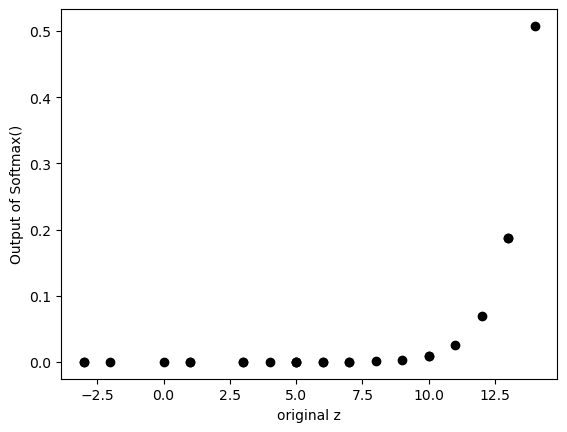

In [19]:
#Plotting the result
plt.plot(z,sigmaT,'ko');
plt.xlabel("original z")
plt.ylabel("Output of Softmax()")

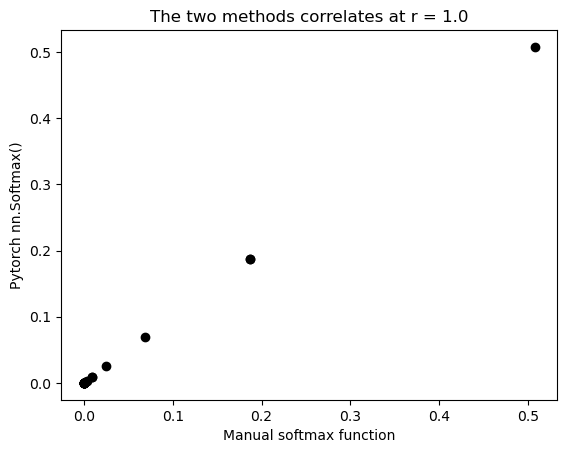

In [24]:
#Comparing the two result
plt.plot(sigma,sigmaT,'ko')
plt.xlabel("Manual softmax function")
plt.ylabel("Pytorch nn.Softmax()")
plt.title(f"The two methods correlates at r = {np.corrcoef(sigma,sigmaT)[0,1]}")
plt.show()